## Week 1 : Data Manipulation and Exploration
```
- Machine Learning, Innopolis University (Fall semester 2023)
- Professor: Adil Khan
- Teaching Assistant: Gcinizwe Dlamini
```
<hr>


### Content
```
Lab Plan
1. Data exploration
2. Dealing with categorical features
3. Dealing with missing data
4. Features Scaling
5. Trainset splitting
6. Data Visualization

```

<hr>


![](https://www.gosmar.eu/machinelearning/wp-content/uploads/2021/01/MLOps_pipeline_scaling3.png)

## Test for libraries installation

In [ ]:
import pandas as pd
import numpy as np
import sklearn

import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 1. Read Data with Pandas

In [ ]:
football_df = pd.read_csv("./drive/MyDrive/Colab Notebooks/innop_ml_seminar/lab1/football_data.csv", low_memory=False)

football_df.drop(['Date', 'time'], axis=1, inplace=True)

## 2. Data exploration

In [ ]:
football_df.head(5)

GameID  Drive  qtr  down  TimeUnder  TimeSecs  PlayTimeDiff  \
0  2016121101     13    2   NaN          2    1920.0           5.0   
1  2016121101     13    2   1.0          2    1920.0           0.0   
2  2016121101     13    2   1.0          2    1910.0          10.0   
3  2016121101     13    2   2.0          2    1877.0          33.0   
4  2016121101     13    2   3.0          2    1868.0           9.0   

  SideofField  yrdln  yrdline100  ...    yacEPA  Home_WP_pre  Away_WP_pre  \
0          SD   44.0        44.0  ...       NaN          NaN          NaN   
1          SD   47.0        53.0  ...  0.330475     0.968025     0.031975   
2         CAR    7.0         7.0  ...       NaN     0.940170     0.059830   
3         CAR    9.0         9.0  ... -3.766159     0.947575     0.052425   
4         CAR    9.0         9.0  ...  0.000000     0.953601     0.046399   

   Home_WP_post Away_WP_post  Win_Prob       WPA    airWPA    yacWPA  Season  
0           NaN          NaN  0.000000       NaN       NaN       NaN    2016  
1      0.940170     0.059830  0.031975  0.027855  0.024299  0.003556    2016  
2      0.947575     0.052425  0.059830 -0.007405       NaN       NaN    2016  
3      0.953601     0.046399  0.052425 -0.006025  0.036136 -0.042161    2016  
4      0.912354     0.087646  0.046399  0.041247  0.041247  0.000000    2016  

[5 rows x 100 columns]

In [ ]:
types = football_df.dtypes
print("Number categorical featues:", sum(types=='object'))
print(types)

Number categorical featues: 36
GameID         int64
Drive          int64
qtr            int64
down         float64
TimeUnder      int64
              ...   
Win_Prob     float64
WPA          float64
airWPA       float64
yacWPA       float64
Season         int64
Length: 100, dtype: object


In [ ]:
football_df.describe()

GameID         Drive           qtr         down     TimeUnder  \
count  1.000000e+04  10000.000000  10000.000000  8448.000000  10000.000000   
mean   2.016372e+09     12.444900      2.584500     1.991951      7.322400   
std    3.996451e+05      7.075561      1.131542     1.006399      4.685216   
min    2.016121e+09      1.000000      1.000000     1.000000      0.000000   
25%    2.016122e+09      6.000000      2.000000     1.000000      3.000000   
50%    2.016122e+09     12.000000      3.000000     2.000000      7.000000   
75%    2.017010e+09     18.000000      4.000000     3.000000     11.000000   
max    2.017010e+09     30.000000      5.000000     4.000000     15.000000   

          TimeSecs  PlayTimeDiff        yrdln   yrdline100       ydstogo  ...  \
count  9992.000000   9984.000000  9980.000000  9980.000000  10000.000000  ...   
mean   1686.264011     20.739283    28.566433    47.859218      7.158400  ...   
std    1064.437980     20.795996    12.533362    24.737534      4.844632  ...   
min    -849.000000      0.000000     1.000000     1.000000      0.000000  ...   
25%     772.000000      5.000000    19.000000    29.000000      3.000000  ...   
50%    1800.000000     18.000000    30.000000    48.000000      9.000000  ...   
75%    2575.000000     37.000000    38.000000    69.000000     10.000000  ...   
max    3600.000000    908.000000    50.000000    99.000000     36.000000  ...   

            yacEPA  Home_WP_pre  Away_WP_pre  Home_WP_post  Away_WP_post  \
count  3929.000000  9357.000000  9357.000000   9309.000000   9309.000000   
mean     -0.400785     0.547408     0.453126      0.547667      0.452708   
std       2.008014     0.300660     0.300744      0.302591      0.302650   
min     -12.156367     0.000000     0.000000      0.000000      0.000000   
25%      -0.950799     0.298087     0.183309      0.295898      0.179571   
50%       0.000000     0.565156     0.435096      0.568334      0.431754   
75%       0.469628     0.817714     0.702465      0.820549      0.705156   
max       8.079540     1.000000     1.000000      1.000000      1.000000   

           Win_Prob           WPA       airWPA       yacWPA   Season  
count  10000.000000  9.845000e+03  3930.000000  3923.000000  10000.0  
mean       0.470946  1.673133e-03     0.014596    -0.009764   2016.0  
std        0.319106  4.684680e-02     0.056720     0.065689      0.0  
min        0.000000 -9.719480e-01    -0.943119    -0.939447   2016.0  
25%        0.172491 -1.375776e-02    -0.009758    -0.017638   2016.0  
50%        0.486653 -7.985673e-07     0.004151     0.000000   2016.0  
75%        0.750169  1.278280e-02     0.033391     0.009991   2016.0  
max        1.000000  9.739204e-01     0.898214     0.932194   2016.0  

[8 rows x 64 columns]

## 3. Profiling the data

In [ ]:
!pip install ydata_profiling
from ydata_profiling import ProfileReport

report = ProfileReport(football_df)
# report.to_file('data_profile_report.html')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.3/357.3 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 12.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 29.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 31.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 68.5 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=799df710b61acdfd6136ea6c653524bd12d747385b46b20f897d024d7ed4f2e9
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


### One-hot-encoding of categorical feature
1. Why to encode the categorical feature?
2. Why one-hot-encoding form? why not give each category in the feature a specific code value?
3. How many new features will be added? What if we have some missing values, which is the case in this dataset?
4. When is it appropriate to give each category an encoding value?


<span style="color:red"> Task : In the next cell, implement the function that take a dataframe, name of the categorical feature, and the encoder object. Then, adds new features that represent the one-hot-encoding form of this feature and ignore the missing values in it (encode them to zeros).

In [ ]:
!pip install category_encoders
from category_encoders import OneHotEncoder

cat_feats = football_df.select_dtypes(include=['object']).columns.tolist()
encoder = OneHotEncoder(cols=cat_feats)

encoder.fit(football_df)

# Write your code here (1 line)
def ohe_df(df: pd.DataFrame, feature_name: str, encoder: OneHotEncoder):
    encoded_data = encoder.fit_transform(pd.DataFrame(football_df[feature_name]))
    pd.concat([football_df.drop([feature_name], axis=1), encoded_data], axis=1)


# Transform the data
encoded_data = encoder.transform(football_df)
encoded_data


GameID  Drive  qtr  down  TimeUnder  TimeSecs  PlayTimeDiff  \
0     2016121101     13    2   NaN          2    1920.0           5.0   
1     2016121101     13    2   1.0          2    1920.0           0.0   
2     2016121101     13    2   1.0          2    1910.0          10.0   
3     2016121101     13    2   2.0          2    1877.0          33.0   
4     2016121101     13    2   3.0          2    1868.0           9.0   
...          ...    ...  ...   ...        ...       ...           ...   
9995  2017010102     20    4   1.0          1      22.0           6.0   
9996  2017010102     20    4   NaN          1      13.0           9.0   
9997  2017010102     21    4   NaN          1      13.0           0.0   
9998  2017010102     21    4   1.0          1      12.0           1.0   
9999  2017010102     21    4   NaN          0       0.0          12.0   

      SideofField_1  SideofField_2  SideofField_3  ...    yacEPA  Home_WP_pre  \
0                 1              0              0  ...       NaN          NaN   
1                 1              0              0  ...  0.330475     0.968025   
2                 0              1              0  ...       NaN     0.940170   
3                 0              1              0  ... -3.766159     0.947575   
4                 0              1              0  ...  0.000000     0.953601   
...             ...            ...            ...  ...       ...          ...   
9995              0              0              0  ...  0.000000     0.051901   
9996              0              0              0  ...       NaN     0.093435   
9997              0              0              0  ...       NaN     0.034069   
9998              0              0              0  ...       NaN     0.035708   
9999              0              0              0  ...       NaN     0.000000   

      Away_WP_pre  Home_WP_post  Away_WP_post  Win_Prob       WPA    airWPA  \
0             NaN           NaN           NaN  0.000000       NaN       NaN   
1        0.031975      0.940170      0.059830  0.031975  0.027855  0.024299   
2        0.059830      0.947575      0.052425  0.059830 -0.007405       NaN   
3        0.052425      0.953601      0.046399  0.052425 -0.006025  0.036136   
4        0.046399      0.912354      0.087646  0.046399  0.041247  0.041247   
...           ...           ...           ...       ...       ...       ...   
9995     0.948099      0.093435      0.906565  0.051901  0.041534  0.041534   
9996     0.906565      0.034069      0.965931  0.093435 -0.059366       NaN   
9997     0.965931      0.035708      0.964292  0.965931 -0.001639       NaN   
9998     0.964292      0.000000      1.000000  0.964292  0.035708       NaN   
9999     1.000000      0.000000      1.000000  0.934245  0.000000       NaN   

        yacWPA  Season  
0          NaN    2016  
1     0.003556    2016  
2          NaN    2016  
3    -0.042161    2016  
4     0.000000    2016  
...        ...     ...  
9995  0.000000    2016  
9996       NaN    2016  
9997       NaN    2016  
9998       NaN    2016  
9999       NaN    2016  

[10000 rows x 13035 columns]

In [ ]:
encoded_data.columns

Index(['GameID', 'Drive', 'qtr', 'down', 'TimeUnder', 'TimeSecs',
       'PlayTimeDiff', 'SideofField_1', 'SideofField_2', 'SideofField_3',
       ...
       'yacEPA', 'Home_WP_pre', 'Away_WP_pre', 'Home_WP_post', 'Away_WP_post',
       'Win_Prob', 'WPA', 'airWPA', 'yacWPA', 'Season'],
      dtype='object', length=13035)

## 4. Data Imputation
#### Imputation is filling the missing values in the dataset.
Several issues to address:
1. Why we should fill them? Why not remove the rows that has missing values?
2. Filling it with constant value for each value, but what's it?
3. (Advanced) Estimate the filling value, each row for its own.
4. How to choose the imputation strategy?
5. (Not related only to imputations) Why we fit the imputer to the training data not the concatenation of both train and test set?


<span style="color:red">Task :  In the next cell, implement a function that returns the count of nan/empty cells in a dataframe.</span><br>
<span style="color:red">Task : Use SimpleImputer object, fit it to the trainset, then transform both the train and test sets.</span>

In [ ]:
from sklearn.impute import SimpleImputer
import numpy as np

#TODO: Complete a function that returns number of empty cells
def count_nans(df):
    # return np.sum(np.sum(np.isnan(df))) #np.count_nonzero(~np.isnan(df))
    return df.isnull().sum().sum()

# Print number of empty cells (1 line)d
print("#Empty missing data cells in the dataset = ", count_nans(encoded_data))

# Write your code here (3-4 lines):
imputer = SimpleImputer()
imputer.fit(encoded_data)
imputed_data = pd.DataFrame(imputer.transform(encoded_data), columns=encoded_data.columns)
# create the imputer object.
# fit the imputer.
# transform the data

print("After Imputing:")
# Print number of empty cells in the data(1 line)
print("#Empty cells in dataset =", count_nans(imputed_data))

#Empty missing data cells in the dataset =  42015
After Imputing:
#Empty cells in dataset = 0


In [ ]:
imputed_data.columns
# imputed_data.shape == encoded_data.shape  ##True
imputed_data

GameID  Drive  qtr      down  TimeUnder  TimeSecs  PlayTimeDiff  \
0     2.016121e+09   13.0  2.0  1.991951        2.0    1920.0           5.0   
1     2.016121e+09   13.0  2.0  1.000000        2.0    1920.0           0.0   
2     2.016121e+09   13.0  2.0  1.000000        2.0    1910.0          10.0   
3     2.016121e+09   13.0  2.0  2.000000        2.0    1877.0          33.0   
4     2.016121e+09   13.0  2.0  3.000000        2.0    1868.0           9.0   
...            ...    ...  ...       ...        ...       ...           ...   
9995  2.017010e+09   20.0  4.0  1.000000        1.0      22.0           6.0   
9996  2.017010e+09   20.0  4.0  1.991951        1.0      13.0           9.0   
9997  2.017010e+09   21.0  4.0  1.991951        1.0      13.0           0.0   
9998  2.017010e+09   21.0  4.0  1.000000        1.0      12.0           1.0   
9999  2.017010e+09   21.0  4.0  1.991951        0.0       0.0          12.0   

      SideofField_1  SideofField_2  SideofField_3  ...    yacEPA  Home_WP_pre  \
0               1.0            0.0            0.0  ... -0.400785     0.547408   
1               1.0            0.0            0.0  ...  0.330475     0.968025   
2               0.0            1.0            0.0  ... -0.400785     0.940170   
3               0.0            1.0            0.0  ... -3.766159     0.947575   
4               0.0            1.0            0.0  ...  0.000000     0.953601   
...             ...            ...            ...  ...       ...          ...   
9995            0.0            0.0            0.0  ...  0.000000     0.051901   
9996            0.0            0.0            0.0  ... -0.400785     0.093435   
9997            0.0            0.0            0.0  ... -0.400785     0.034069   
9998            0.0            0.0            0.0  ... -0.400785     0.035708   
9999            0.0            0.0            0.0  ... -0.400785     0.000000   

      Away_WP_pre  Home_WP_post  Away_WP_post  Win_Prob       WPA    airWPA  \
0        0.453126      0.547667      0.452708  0.000000  0.001673  0.014596   
1        0.031975      0.940170      0.059830  0.031975  0.027855  0.024299   
2        0.059830      0.947575      0.052425  0.059830 -0.007405  0.014596   
3        0.052425      0.953601      0.046399  0.052425 -0.006025  0.036136   
4        0.046399      0.912354      0.087646  0.046399  0.041247  0.041247   
...           ...           ...           ...       ...       ...       ...   
9995     0.948099      0.093435      0.906565  0.051901  0.041534  0.041534   
9996     0.906565      0.034069      0.965931  0.093435 -0.059366  0.014596   
9997     0.965931      0.035708      0.964292  0.965931 -0.001639  0.014596   
9998     0.964292      0.000000      1.000000  0.964292  0.035708  0.014596   
9999     1.000000      0.000000      1.000000  0.934245  0.000000  0.014596   

        yacWPA  Season  
0    -0.009764  2016.0  
1     0.003556  2016.0  
2    -0.009764  2016.0  
3    -0.042161  2016.0  
4     0.000000  2016.0  
...        ...     ...  
9995  0.000000  2016.0  
9996 -0.009764  2016.0  
9997 -0.009764  2016.0  
9998 -0.009764  2016.0  
9999 -0.009764  2016.0  

[10000 rows x 13035 columns]

## 5. Features Scaling
1. Why we need to make all the features have same range of values?
<span style="color:blue"> This has something to do with some machine learning algorithms.
First, gradient-related algorithms (e.g., linear regression, logisitic regression, deep learning algorithms): feature scaling is important for the congergence of the algorithms as the gradient in one direction/feature could need more/long steps than the others and the scaling solves this issue and make the training stable and relatively faster.
Second, distance related algorithms (e.g., KNN, K-means). These algorithms depends on the distance between samples both in training and testing. Having features with different ranges would affect the distance measure and produce biased prediciton to the features with larger range.
for example: having two features (length in KM [10: 10000] and temperature in C° [20: 40]). The distance value will be much affected by the length feature.</span>

1. What are the different strategies to scale the features? <br>
    * <span style="color:blue">Min-Max scaling: transform all features to fall in this range: [0, 1].</span><br>
$$x_i = \frac{x_i - min(\mathbf{x})}{max(\mathbf{x}) - min(\mathbf{x})}$$
    * <span style="color:blue">Standard scaling: transform all features to have mean = 0 and standard deviation = 1. And by assuming that all features follow normal distribution, we can say that standard scaling turns featrues to be $\sim N(0,1)$.</span> <br>
$$x_i = \frac{x_i - mean(\mathbf{x})}{stdev(\mathbf{x})}$$ <br>
    * <span style="color:blue">Robust scaling: robust to the outliers that may affect the previous methods in calculating their mean, stdev, min, or max. It uses the interquartile range to scale the features according to it.
Interquartile is the range between the 1st quartile and 3rd quartile.</span> <br>
$$x_i = \frac{x_i - Q_1(\mathbf{x})}{Q_3(\mathbf{x}) - Q_1(\mathbf{x})}$$

3. How to choose the strategy?
<span style="color:blue">Same as in imputation strategy, using a validation set or using cross-validation.

<span style="color:red">  In the following cell, scale all the features with a scaler from your choice. Fit the scaler on the full data set and transform both it.</span>

In [ ]:
from sklearn.preprocessing import RobustScaler

# Write your code here (4 lines):
robust_scaler = RobustScaler()
robust_scaler.fit(imputed_data)
scaled_data = pd.DataFrame(robust_scaler.transform(imputed_data), columns=imputed_data.columns)
# choose the scaler class.
# create the scaler object.
# fit it to the data.
# transform the data
scaled_data

GameID     Drive  qtr      down  TimeUnder  TimeSecs  PlayTimeDiff  \
0    -0.001465  0.083333 -0.5 -0.008049     -0.625  0.066583      -0.40625   
1    -0.001465  0.083333 -0.5 -1.000000     -0.625  0.066583      -0.56250   
2    -0.001465  0.083333 -0.5 -1.000000     -0.625  0.061035      -0.25000   
3    -0.001465  0.083333 -0.5  0.000000     -0.625  0.042724       0.46875   
4    -0.001465  0.083333 -0.5  1.000000     -0.625  0.037731      -0.28125   
...        ...       ...  ...       ...        ...       ...           ...   
9995  0.999327  0.666667  0.5 -1.000000     -0.750 -0.986545      -0.37500   
9996  0.999327  0.666667  0.5 -0.008049     -0.750 -0.991538      -0.28125   
9997  0.999327  0.750000  0.5 -0.008049     -0.750 -0.991538      -0.56250   
9998  0.999327  0.750000  0.5 -1.000000     -0.750 -0.992093      -0.53125   
9999  0.999327  0.750000  0.5 -0.008049     -0.875 -0.998752      -0.18750   

      SideofField_1  SideofField_2  SideofField_3  ...    yacEPA  Home_WP_pre  \
0               1.0            0.0            0.0  ...  0.000000     0.000000   
1               1.0            0.0            0.0  ...  1.825346     0.886112   
2               0.0            1.0            0.0  ...  0.000000     0.827430   
3               0.0            1.0            0.0  ... -8.400533     0.843030   
4               0.0            1.0            0.0  ...  1.000426     0.855724   
...             ...            ...            ...  ...       ...          ...   
9995            0.0            0.0            0.0  ...  1.000426    -1.043883   
9996            0.0            0.0            0.0  ...  0.000000    -0.956383   
9997            0.0            0.0            0.0  ...  0.000000    -1.081450   
9998            0.0            0.0            0.0  ...  0.000000    -1.077997   
9999            0.0            0.0            0.0  ...  0.000000    -1.153223   

      Away_WP_pre  Home_WP_post  Away_WP_post  Win_Prob       WPA    airWPA  \
0        0.000000      0.000000      0.000000 -0.842430  0.065468  0.000000   
1       -0.886499      0.821954     -0.822555 -0.787079  1.089942  0.009702   
2       -0.827866      0.837461     -0.838058 -0.738860 -0.289749  0.000000   
3       -0.843453      0.850079     -0.850673 -0.751679 -0.235764  0.021540   
4       -0.856136      0.763703     -0.764317 -0.762109  1.613940  0.026650   
...           ...           ...           ...       ...       ...       ...   
9995     1.041889     -0.951221      0.950225 -0.752586  1.625200  0.026938   
9996     0.954462     -1.075542      1.074519 -0.680687 -2.322953  0.000000   
9997     1.079425     -1.072109      1.071087  0.829663 -0.064142  0.000000   
9998     1.075974     -1.146887      1.145848  0.826825  1.397225  0.000000   
9999     1.151138     -1.146887      1.145848  0.774811  0.000000  0.000000   

        yacWPA  Season  
0     0.000000     0.0  
1     1.447457     0.0  
2     0.000000     0.0  
3    -3.520477     0.0  
4     1.060994     0.0  
...        ...     ...  
9995  1.060994     0.0  
9996  0.000000     0.0  
9997  0.000000     0.0  
9998  0.000000     0.0  
9999  0.000000     0.0  

[10000 rows x 13035 columns]

In [ ]:
scaled_data

GameID     Drive  qtr      down  TimeUnder  TimeSecs  PlayTimeDiff  \
0    -0.001465  0.083333 -0.5 -0.008049     -0.625  0.066583      -0.40625   
1    -0.001465  0.083333 -0.5 -1.000000     -0.625  0.066583      -0.56250   
2    -0.001465  0.083333 -0.5 -1.000000     -0.625  0.061035      -0.25000   
3    -0.001465  0.083333 -0.5  0.000000     -0.625  0.042724       0.46875   
4    -0.001465  0.083333 -0.5  1.000000     -0.625  0.037731      -0.28125   
...        ...       ...  ...       ...        ...       ...           ...   
9995  0.999327  0.666667  0.5 -1.000000     -0.750 -0.986545      -0.37500   
9996  0.999327  0.666667  0.5 -0.008049     -0.750 -0.991538      -0.28125   
9997  0.999327  0.750000  0.5 -0.008049     -0.750 -0.991538      -0.56250   
9998  0.999327  0.750000  0.5 -1.000000     -0.750 -0.992093      -0.53125   
9999  0.999327  0.750000  0.5 -0.008049     -0.875 -0.998752      -0.18750   

      SideofField_1  SideofField_2  SideofField_3  ...    yacEPA  Home_WP_pre  \
0               1.0            0.0            0.0  ...  0.000000     0.000000   
1               1.0            0.0            0.0  ...  1.825346     0.886112   
2               0.0            1.0            0.0  ...  0.000000     0.827430   
3               0.0            1.0            0.0  ... -8.400533     0.843030   
4               0.0            1.0            0.0  ...  1.000426     0.855724   
...             ...            ...            ...  ...       ...          ...   
9995            0.0            0.0            0.0  ...  1.000426    -1.043883   
9996            0.0            0.0            0.0  ...  0.000000    -0.956383   
9997            0.0            0.0            0.0  ...  0.000000    -1.081450   
9998            0.0            0.0            0.0  ...  0.000000    -1.077997   
9999            0.0            0.0            0.0  ...  0.000000    -1.153223   

      Away_WP_pre  Home_WP_post  Away_WP_post  Win_Prob       WPA    airWPA  \
0        0.000000      0.000000      0.000000 -0.842430  0.065468  0.000000   
1       -0.886499      0.821954     -0.822555 -0.787079  1.089942  0.009702   
2       -0.827866      0.837461     -0.838058 -0.738860 -0.289749  0.000000   
3       -0.843453      0.850079     -0.850673 -0.751679 -0.235764  0.021540   
4       -0.856136      0.763703     -0.764317 -0.762109  1.613940  0.026650   
...           ...           ...           ...       ...       ...       ...   
9995     1.041889     -0.951221      0.950225 -0.752586  1.625200  0.026938   
9996     0.954462     -1.075542      1.074519 -0.680687 -2.322953  0.000000   
9997     1.079425     -1.072109      1.071087  0.829663 -0.064142  0.000000   
9998     1.075974     -1.146887      1.145848  0.826825  1.397225  0.000000   
9999     1.151138     -1.146887      1.145848  0.774811  0.000000  0.000000   

        yacWPA  Season  
0     0.000000     0.0  
1     1.447457     0.0  
2     0.000000     0.0  
3    -3.520477     0.0  
4     1.060994     0.0  
...        ...     ...  
9995  1.060994     0.0  
9996  0.000000     0.0  
9997  0.000000     0.0  
9998  0.000000     0.0  
9999  0.000000     0.0  

[10000 rows x 13035 columns]

## 6. Trainset splitting
Issues that lead to trainset splitting:
1. How we will measure the performance of our model?
<span style="color:blue"> Measuring performance on the trainset is not a good idea intuitively, as to estimate the generalization error, we need to evaluate the model on a data that wasn't seen before.
So we need to split the dataset that we have to two parts trainset and testset.
2. How we will tune the hyperparamters? Can it be done with testset?
<span style="color:blue"> If we tuned the hyperparamters on the testset, this will be considered as Data leakage as the hyperparams were tuned on the set that represent the evaluation, so there's a high chance that it will overfit the testset and fails to generalize (i.e., get high test accuracy but fails in production for example).
So, it is a must to split the data into 3 parts:
(70%) trainset to train the params , (10%) validation set to tune the hyperparameters (it can be used for other stuff like early stopping (tbe)), and (20%) testset to evaluate the model finally.

Issues to think of:
1. Is is the best strategy to get the best estimate for the true risk/performance of the system?
<span style="color:blue"> There's a chance that the testset is biased. So, a better way to estimate the true generalization error is to use cross validation.
Cross validation is a method where the dataset, is divided into k equally sized folds then we train on k-1 folds and test on the left one and repeat this process k times for each fold and get k estimates, finally we average all of these k accuracies to represent the final accuracy.
2. (Advanced) How to choose between two models?
If you have two models one with test accuracy 90% and the other with 91% (averaged from cross valdiation), which one to choose?
<span style="color:blue"> The naive/fast approach is to use the model with higher accuracy. But what if these estimates are not significantly different (we got them by chance), then a hypothesis test needs to be done.
After testing each model for each fold from the k-folds we can use "Paired t-test" to test if they are significantly different or not.
<br />(more advanced way, which is used in industry: A/B testing, watch about it [here](https://www.youtube.com/watch?v=zFMgpxG-chM))

<span style="color:red"> TASK : In the next task, you will split your data into 3 parts, train, test, and validation by ratios: 70%, 20%, and 10% respectively.</span>

In [ ]:
from sklearn.model_selection import train_test_split

# TODO: Write your code here (2 lines)
X_train, X_test = train_test_split(scaled_data, train_size=0.7, test_size=0.3)
X_test, X_val = train_test_split(X_test, train_size=0.6666666666, test_size=0.3333333333)

# print(X_train.shape, X_test.shape, X_val.shape)
# print(X_train.shape[0]/scaled_data.shape[0], X_test.shape[0]/scaled_data.shape[0], X_val.shape[0]/scaled_data.shape[0])

print(X_train.shape[0], X_test.shape[0], X_val.shape[0])
print(X_train.shape[0]/scaled_data.shape[0], X_test.shape[0]/scaled_data.shape[0], X_val.shape[0]/scaled_data.shape[0])


7000 1999 1000
0.7 0.1999 0.1


## 7. Data Visualization
Visualization is key-issue to get some insights and intuition about your dataset.
How to plot 259 features (259-dimensional data)? what we can plot -at maximum- is 2d or 3d data.

Hint: We should reduce the dimension. Read this [article](https://towardsdatascience.com/dimensionality-reduction-ways-and-intuitions-1b5e97592d8e).

So, Let's use UMAP to reduce the dimension of this dataset to be 2D.

In [ ]:
from sklearn.decomposition import PCA

dim_reducer = PCA(n_components=2)
x_train_reduced = dim_reducer.fit_transform(X_train)
x_train_reduced.shape

(7000, 2)

Let's plot the reduced dataset on a 2D plane.
Use matplotlib to make a scatter plot for the reduced dataset.

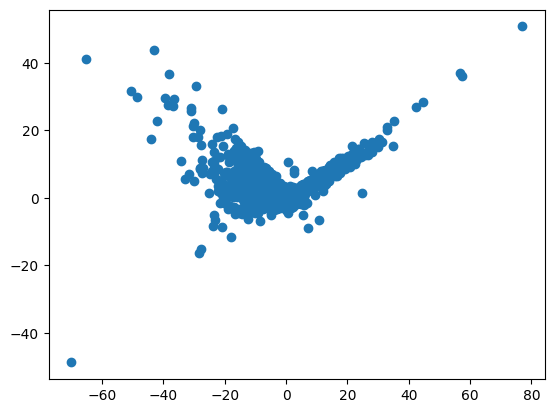

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

# Write code to plot the reduced dataset in a scatter plot.

plt.scatter(x_train_reduced[:, 0], x_train_reduced[:, 1])

## 8. Self Practice task

Using the Football dataset follow the steps below:
1. Select `Win_Prob` as target variable
1. Remove columns with constant value (i.e all the values in the column are equal to zero)
1. Extract features from `Date` and `time` column
1. Remove all columns with more than 99% missing values
1. Remove all columns with 99% distinct values
1. Split the data into train (80%) and test(20%) sets.
1. Split the train data into train (80%) and validation sets.
1. Encode categorical data using a different encoder (not One Hot encoder) : see [Category Encoders](https://contrib.scikit-learn.org/category_encoders/index.html) for a full list. remember that you fit the encoder on train data only and then transform test data
1. Impute missing values

<span style="color:red"> NOTE : Make use of the insights from pandas profiling report</span>

1.

In [ ]:
# 1
# y = football_df['Win_Prob']

# 2
# for i in football_df:
#     for j in i:
#       print(i)

# 3
footbll_df = pd.read_csv("./football_data.csv", low_memory=False)
date, time = pd.to_datetime(footbll_df['Date']).dt.to_period('D'), pd.to_datetime(footbll_df['time'])
day, month, year = date.day, date.month, date.year

# 4

list(zip(day, month, year))
